# Import all required libraries.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

In [4]:
import cv2
import pandas as pd
import os
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
np.random.seed(42)
tf.random.set_seed(42)

# Read the input images and extract their labels.

In [3]:
path = "C:/Users/lenovo/Desktop/abc4/content/combined_faces"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 33486
100_1.jpg


In [6]:
all_images = os.listdir('C:/Users/lenovo/Desktop/abc4/content/combined_faces/')
ranges = ['1-2','3-9','10-20','21-27','28-45','46-65','66-116']
X = []
y = []
l = len(all_images)
for a in range(l):
    X.append(cv2.imread(f'C:/Users/lenovo/Desktop/abc4/content/combined_faces/{all_images[a]}',0))
    age = int(all_images[a].split('_')[0])
    if age>=1 and age<=2:
        y.append(0)
    elif age>=3 and age<=9:
        y.append(1)
    elif age>=10 and age<=20:
        y.append(2)
    elif age>=21 and age<=27:
        y.append(3)
    elif age>=28 and age<=45:
        y.append(4)
    elif age>=46 and age<=65:
        y.append(5)
    elif age>=66 and age<=116:
        y.append(6)
    print(str(a)+'/'+str(l))
np.savez_compressed('compressed image data.npz',x=X,y=y)

0/33486
1/33486
2/33486
3/33486
4/33486
5/33486
6/33486
7/33486
8/33486
9/33486
10/33486
11/33486
12/33486
13/33486
14/33486
15/33486
16/33486
17/33486
18/33486
19/33486
20/33486
21/33486
22/33486
23/33486
24/33486
25/33486
26/33486
27/33486
28/33486
29/33486
30/33486
31/33486
32/33486
33/33486
34/33486
35/33486
36/33486
37/33486
38/33486
39/33486
40/33486
41/33486
42/33486
43/33486
44/33486
45/33486
46/33486
47/33486
48/33486
49/33486
50/33486
51/33486
52/33486
53/33486
54/33486
55/33486
56/33486
57/33486
58/33486
59/33486
60/33486
61/33486
62/33486
63/33486
64/33486
65/33486
66/33486
67/33486
68/33486
69/33486
70/33486
71/33486
72/33486
73/33486
74/33486
75/33486
76/33486
77/33486
78/33486
79/33486
80/33486
81/33486
82/33486
83/33486
84/33486
85/33486
86/33486
87/33486
88/33486
89/33486
90/33486
91/33486
92/33486
93/33486
94/33486
95/33486
96/33486
97/33486
98/33486
99/33486
100/33486
101/33486
102/33486
103/33486
104/33486
105/33486
106/33486
107/33486
108/33486
109/33486
110/33486


# How to load the compressed npz data…

In [8]:
loaded = np.load('compressed image data.npz', allow_pickle=True)
X = loaded['x']
y = loaded['y']
X

array([[[ 43,  42,  40, ...,  79,  75,  73],
        [ 43,  42,  40, ...,  80,  76,  73],
        [ 42,  40,  39, ...,  81,  79,  77],
        ...,
        [ 74,  78,  82, ...,  75,  71,  69],
        [ 75,  78,  83, ...,  77,  74,  71],
        [ 74,  77,  79, ...,  79,  75,  73]],

       [[  9,  11,  13, ..., 163, 162, 162],
        [ 11,  13,  15, ..., 164, 163, 162],
        [ 13,  15,  18, ..., 165, 164, 163],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 43,  42,  40, ...,  79,  75,  73],
        [ 43,  42,  40, ...,  80,  76,  74],
        [ 42,  40,  39, ...,  81,  79,  77],
        ...,
        [ 74,  78,  82, ...,  75,  71,  69],
        [ 75,  78,  83, ...,  77,  74,  71],
        [ 74,  76,  79, ...,  79,  75,  73]],

       ...,

       [[ 33,  23,  12, ...,  26,  40,  51],
        [ 24,  17,  10, ...,  22,  37,  49],
        [ 14,  11,   8, ...,  17,  34,  48

# Visualize an image.

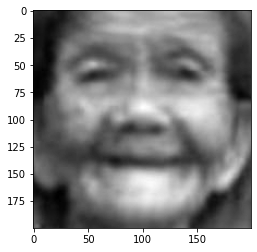

In [9]:
plt.imshow(X[0],cmap='gray')

# One hot encode y array.

In [10]:
y = np_utils.to_categorical(y)
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Train Test Split the data for creating Age Detection using the CNN model.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train = np.array(X_train).reshape(-1,200,200,1)
X_test = np.array(X_test).reshape(-1,200,200,1)

# Initialize some constants.

In [12]:
IMG_HEIGHT = 200
IMG_WIDTH = 200
IMG_SIZE = (IMG_HEIGHT,IMG_WIDTH)
batch_size = 128
epochs = 5

# Create ImageDataGenerator objects for data augmentation.

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   height_shift_range=0.1,
                                   width_shift_range=0.1,
                                   rotation_range=15)
test_datagen = ImageDataGenerator(rescale=1./255)

# Augment the Data for Age Detection using the CNN model.

In [14]:
train_data = train_datagen.flow(X_train,y_train,batch_size)
test_data = test_datagen.flow(X_test,y_test,batch_size)

# Creating the Age Detection using the CNN model.

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(200, 200, 1)))    # 3rd dim = 1 for grayscale images.
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(132, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 average_pooling2d (AverageP  (None, 99, 99, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 23, 23, 128)      0

# Create a Model Checkpoint to save just the best model.

In [16]:
checkpoint = ModelCheckpoint(filepath="final_cnn_model_checkpoint.h5",
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1)

#  Train the Age Detection using the CNN model.


In [17]:
history = model.fit(train_data,
                    batch_size=batch_size,
                    validation_data=test_data,
                    epochs=epochs,
                    callbacks=[checkpoint],
                    shuffle=False) 

Epoch 1/5
184/184 [==============================] - ETA: 0s - loss: 1.7975 - accuracy: 0.2873
Epoch 1: val_accuracy improved from -inf to 0.31694, saving model to final_cnn_model_checkpoint.h5
184/184 [==============================] - 1650s 9s/step - loss: 1.7975 - accuracy: 0.2873 - val_loss: 1.7497 - val_accuracy: 0.3169
Epoch 2/5
184/184 [==============================] - ETA: 0s - loss: 1.7349 - accuracy: 0.3173
Epoch 2: val_accuracy improved from 0.31694 to 0.33466, saving model to final_cnn_model_checkpoint.h5
184/184 [==============================] - 1477s 8s/step - loss: 1.7349 - accuracy: 0.3173 - val_loss: 1.6885 - val_accuracy: 0.3347
Epoch 3/5
184/184 [==============================] - ETA: 0s - loss: 1.6976 - accuracy: 0.3270
Epoch 3: val_accuracy did not improve from 0.33466
184/184 [==============================] - 1449s 8s/step - loss: 1.6976 - accuracy: 0.3270 - val_loss: 1.7041 - val_accuracy: 0.3159
Epoch 4/5
184/184 [==============================] - ETA: 0s - l

# Visualize the training process.

In [18]:
plotting_data_dict = history.history
plt.figure(figsize=(12,8))
test_loss = plotting_data_dict['val_loss']
training_loss = plotting_data_dict['loss']
test_accuracy = plotting_data_dict['val_accuracy']
training_accuracy = plotting_data_dict['accuracy']
epochs = range(1,len(test_loss)+1)

<Figure size 864x576 with 0 Axes>

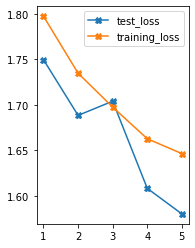

In [19]:
plt.subplot(121)
plt.plot(epochs,test_loss,marker='X',label='test_loss')
plt.plot(epochs,training_loss,marker='X',label='training_loss')
plt.legend()

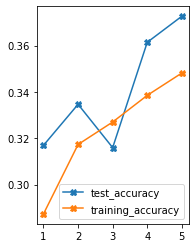

In [20]:
plt.subplot(122)
plt.plot(epochs,test_accuracy,marker='X',label='test_accuracy')
plt.plot(epochs,training_accuracy,marker='X',label='training_accuracy')
plt.legend()

In [21]:
plt.savefig('training.png')

<Figure size 432x288 with 0 Axes>